<a href="https://colab.research.google.com/github/olushogadaini/Rule-Mining/blob/main/Copy_of_Exploring_Relationships_Between_Movie_Genres_Using_Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

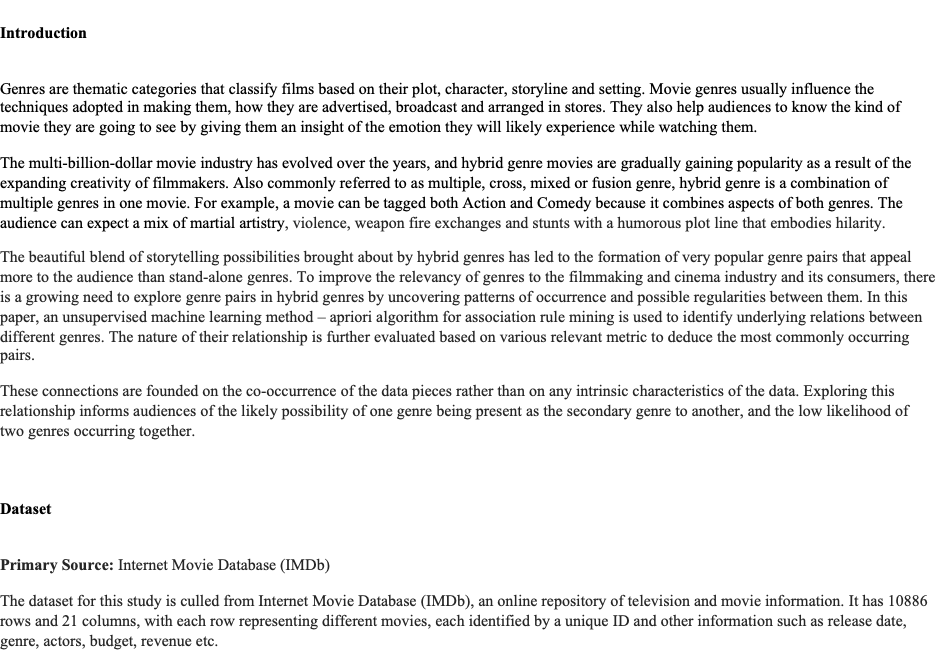

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=3517ab41e888d261e77f4fb2d08dba7de745325996b1162f57207d23b4496518
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px
import seaborn as sns

In [ ]:
#Load the dataset into a dataframe
df = pd.read_csv('tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


# Exploratory Data Analysis

In [ ]:
#viewing the number of rows and columns
df.shape

(10866, 21)

In [ ]:
#viewing the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
#checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
#summarizing dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Preprocessing

In [ ]:
#checking for duplicate rows
df.duplicated().sum()

1

In [ ]:
#dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#extracting only non-empty rows of genres
df = df[df['genres'].notna()]
df['genres'].isna().sum()

0

In [ ]:
#selecting the genres column and splitting by the pipe delimeter
genres_df = df['genres'].apply(lambda x: str(x).split('|'))

#converting the dataframe result into a list of lists
genres = list(genres_df)
genres

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

# Association Rule Mining

In [ ]:
#creating the association rules

rules = list(apriori(genres, min_support = 0.02, min_confidence = 0.2))

In [ ]:
rules

[RelationRecord(items=frozenset({'Action'}), support=0.2198856299575724, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Action'}), confidence=0.2198856299575724, lift=1.0)]),
 RelationRecord(items=frozenset({'Comedy'}), support=0.349843202361188, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Comedy'}), confidence=0.349843202361188, lift=1.0)]),
 RelationRecord(items=frozenset({'Drama'}), support=0.4390333886736764, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Drama'}), confidence=0.4390333886736764, lift=1.0)]),
 RelationRecord(items=frozenset({'Thriller'}), support=0.26812396236856667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Thriller'}), confidence=0.26812396236856667, lift=1.0)]),
 RelationRecord(items=frozenset({'Action', 'Adventure'}), support=0.07885998893193137, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Action'

In [ ]:
#defining a function to extract the rules of association between genres

def obtain(rules, filter = 'All', min_element=1):


    antecedent = []
    consequent = []
    support = []
    confidence = []
    lift = []

    for relation_result in rules:
        rules_count = len(relation_result[2])
        for genre_list in range(rules_count):
            antecedent.append(list(relation_result[2][genre_list][0]))
            consequent.append(list(relation_result[2][genre_list][1]))
            support.append(relation_result[1])
            confidence.append(relation_result[2][genre_list][2])
            lift.append(relation_result[2][genre_list][3])
    association_rules = []
    for rule in range(len(antecedent)):
        if len(antecedent[rule]) + len(consequent[rule]) < min_element:
            continue
        if (filter == 'All') | (filter in consequent[rule]):
            association_rules.append([antecedent[rule], consequent[rule], support[rule], confidence[rule], lift[rule]])
    return association_rules





In [ ]:
#applying the function to obtain the association rules

association_rules = obtain(rules)
association_rules

[[[], ['Action'], 0.2198856299575724, 0.2198856299575724, 1.0],
 [[], ['Comedy'], 0.349843202361188, 0.349843202361188, 1.0],
 [[], ['Drama'], 0.4390333886736764, 0.4390333886736764, 1.0],
 [[], ['Thriller'], 0.26812396236856667, 0.26812396236856667, 1.0],
 [['Action'],
  ['Adventure'],
  0.07885998893193137,
  0.3586409395973154,
  2.643361704360363],
 [['Adventure'],
  ['Action'],
  0.07885998893193137,
  0.5812372535690006,
  2.6433617043603626],
 [['Action'],
  ['Comedy'],
  0.05054418004058292,
  0.22986577181208054,
  0.6570537036611065],
 [['Action'],
  ['Crime'],
  0.05238885814425383,
  0.23825503355704697,
  1.9077999068135179],
 [['Crime'],
  ['Action'],
  0.05238885814425383,
  0.41949778434268836,
  1.907799906813518],
 [['Action'], ['Drama'], 0.06871425936174137, 0.3125, 0.7117909663865547],
 [['Fantasy'],
  ['Action'],
  0.023150710201069912,
  0.27401746724890824,
  1.2461817868761171],
 [['Action'],
  ['Science Fiction'],
  0.04943737317838037,
  0.22483221476510065,
 

In [ ]:
#creating a dataframe of the derived rules

rulesdf = pd.DataFrame(association_rules, columns = ['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])
rulesdf

,Antecedent,Consequent,Support,Confidence,Lift
0,[],[Action],0.219886,0.219886,1.000000
1,[],[Comedy],0.349843,0.349843,1.000000
2,[],[Drama],0.439033,0.439033,1.000000
3,[],[Thriller],0.268124,0.268124,1.000000
4,[Action],[Adventure],0.078860,0.358641,2.643362
...,...,...,...,...,...
80,"[Drama, Thriller]",[Crime],0.044365,0.381746,3.056788
81,[Mystery],"[Drama, Thriller]",0.025733,0.344444,2.963862
82,"[Drama, Mystery]",[Thriller],0.025733,0.702771,2.621067
83,"[Drama, Thriller]",[Mystery],0.025733,0.221429,2.963862


In [ ]:
#visualising all the association rules
fig = px.scatter(rulesdf, x ='Support', y='Confidence', color = 'Lift', hover_data =['Antecedent', 'Consequent'], color_continuous_scale = 'agsunset')
fig.show()

# Exploring the association rules

In [ ]:
#viewing the rules with the top five lift
rulesdf.nlargest(5, 'Lift')

,Antecedent,Consequent,Support,Confidence,Lift
27,[Family],[Animation],0.042797,0.376929,5.846449
26,[Animation],[Family],0.042797,0.663805,5.846449
62,"[Thriller, Adventure]",[Action],0.026748,0.870871,3.960563
58,"[Action, Science Fiction]",[Adventure],0.022597,0.457090,3.368977
59,"[Science Fiction, Adventure]",[Action],0.022597,0.700000,3.183473


In [ ]:
#viewing the positively correlated rules
rulesdf[rulesdf['Lift'].apply(lambda x :x>1)]

,Antecedent,Consequent,Support,Confidence,Lift
4,Action,Adventure,0.078860,0.358641,2.643362
5,Adventure,Action,0.078860,0.581237,2.643362
7,Action,Crime,0.052389,0.238255,1.907800
8,Crime,Action,0.052389,0.419498,1.907800
10,Fantasy,Action,0.023151,0.274017,1.246182
...,...,...,...,...,...
80,"Drama,Thriller",Crime,0.044365,0.381746,3.056788
81,Mystery,"Drama,Thriller",0.025733,0.344444,2.963862
82,"Drama,Mystery",Thriller,0.025733,0.702771,2.621067
83,"Drama,Thriller",Mystery,0.025733,0.221429,2.963862


In [ ]:
#viewing the negative correlated rules
rulesdf[rulesdf['Lift'].apply(lambda x :x<1)]

,Antecedent,Consequent,Support,Confidence,Lift
6,Action,Comedy,0.050544,0.229866,0.657054
9,Action,Drama,0.068714,0.312500,0.711791
16,Adventure,Comedy,0.039107,0.288239,0.823910
17,Adventure,Drama,0.035049,0.258328,0.588401
24,Adventure,Thriller,0.030714,0.226377,0.844298
28,Crime,Comedy,0.030345,0.242984,0.694550
29,Comedy,Drama,0.112710,0.322172,0.733822
30,Drama,Comedy,0.112710,0.256723,0.733822
35,Science Fiction,Comedy,0.023889,0.210740,0.602385
40,Family,Drama,0.027301,0.240455,0.547692


In [ ]:
#viewing the zero correlation rules
rulesdf[rulesdf['Lift'].apply(lambda x :x==1)]

,Antecedent,Consequent,Support,Confidence,Lift
0,,Action,0.219886,0.219886,1.0
1,,Comedy,0.349843,0.349843,1.0
2,,Drama,0.439033,0.439033,1.0
3,,Thriller,0.268124,0.268124,1.0


In [ ]:
#viewing the rules with the top five support
rulesdf.nlargest(5, 'Support')

,Antecedent,Consequent,Support,Confidence,Lift
2,[],[Drama],0.439033,0.439033,1.000000
1,[],[Comedy],0.349843,0.349843,1.000000
3,[],[Thriller],0.268124,0.268124,1.000000
0,[],[Action],0.219886,0.219886,1.000000
46,[Drama],[Thriller],0.116215,0.264706,0.987252


In [ ]:
#viewing the rules with the top five confidence
rulesdf.nlargest(5, 'Confidence')

,Antecedent,Consequent,Support,Confidence,Lift
62,"[Thriller, Adventure]",[Action],0.026748,0.870871,3.960563
42,[History],[Drama],0.026379,0.856287,1.950392
82,"[Drama, Mystery]",[Thriller],0.025733,0.702771,2.621067
55,[Mystery],[Thriller],0.052297,0.700000,2.610733
59,"[Science Fiction, Adventure]",[Action],0.022597,0.700000,3.183473


In [ ]:
#filtering out non-empty antecedents and deducing the association rules with top five support

rulesdf[rulesdf['Antecedent'].apply(lambda x: len(x)>0)].nlargest(5, 'Support')

,Antecedent,Consequent,Support,Confidence,Lift
46,[Drama],[Thriller],0.116215,0.264706,0.987252
47,[Thriller],[Drama],0.116215,0.433437,0.987252
29,[Comedy],[Drama],0.112710,0.322172,0.733822
30,[Drama],[Comedy],0.112710,0.256723,0.733822
44,[Drama],[Romance],0.104409,0.237815,1.506070


# Visualising association rules and further analysis

In [ ]:
#instantiating transaction encoder to obtain a boolean dataframe that shows the presence or absence of each genre in a genre list

encoder = TransactionEncoder().fit(genres)
encoded_genres = encoder.transform(genres)
encoded_genres = pd.DataFrame(encoded_genres, columns = encoder.columns_)
encoded_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10840,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


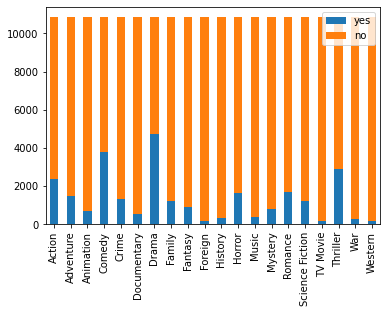

In [ ]:
#visualising the frequency of each genre

yes = (encoded_genres==True).sum()
no = (encoded_genres==False).sum()

encoded_concat = pd.concat([yes,no], axis = 1, keys = ['yes', 'no'])
ax = encoded_concat.plot.bar(stacked=True)
plt.show()

In [ ]:
#from the stacked bar above, we see that Drama is the most occuring and popular genre. Let's explore association rules involving Drama

rules = list(apriori(genres, min_support = 0.02, min_confidence = 0.2))
association_rules = obtain(rules, 'Drama', 2)
rulesdf_drama = pd.DataFrame(association_rules, columns = ['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])
rulesdf_drama

,Antecedent,Consequent,Support,Confidence,Lift
0,[Action],[Drama],0.068714,0.312500,0.711791
1,[Adventure],[Drama],0.035049,0.258328,0.588401
2,[Comedy],[Drama],0.112710,0.322172,0.733822
3,[Crime],[Drama],0.072588,0.581241,1.323910
4,[Family],[Drama],0.027301,0.240455,0.547692
5,[Fantasy],[Drama],0.021583,0.255459,0.581866
6,[History],[Drama],0.026379,0.856287,1.950392
7,[Mystery],[Drama],0.036617,0.490123,1.116369
8,[Romance],[Drama],0.104409,0.661215,1.506070
9,[Thriller],[Drama],0.116215,0.433437,0.987252


In [ ]:
rulesdf_drama.nlargest(5, 'Confidence')

,Antecedent,Consequent,Support,Confidence,Lift
6,[History],[Drama],0.026379,0.856287,1.950392
8,[Romance],[Drama],0.104409,0.661215,1.506070
15,"[Crime, Thriller]",[Drama],0.044365,0.590184,1.344281
3,[Crime],[Drama],0.072588,0.581241,1.323910
13,"[Romance, Comedy]",[Drama],0.043996,0.494301,1.125884


In [ ]:
rulesdf_drama.nlargest(5, 'Lift')

,Antecedent,Consequent,Support,Confidence,Lift
14,[Crime],"[Drama, Thriller]",0.044365,0.355244,3.056788
16,[Mystery],"[Drama, Thriller]",0.025733,0.344444,2.963862
12,[Romance],"[Drama, Comedy]",0.043996,0.278621,2.472025
6,[History],[Drama],0.026379,0.856287,1.950392
8,[Romance],[Drama],0.104409,0.661215,1.506070


In [ ]:
#visualising 'Drama' related association rules on a scatter plot

fig = px.scatter(rulesdf_drama, x ='Support', y='Confidence', color = 'Lift', hover_data =['Antecedent', 'Consequent'], color_continuous_scale = 'agsunset')
fig.show()

In [ ]:
#plotting consequents and antecedent on a heatmap

#converting antecedents and consequents into strings
rulesdf['Antecedent'] = rulesdf['Antecedent'].apply(lambda x: ','.join(list(x)))
rulesdf['Consequent'] = rulesdf['Consequent'].apply(lambda x: ','.join(list(x)))

In [ ]:
print(rulesdf[['Antecedent','Consequent']])

          Antecedent      Consequent
0                             Action
1                             Comedy
2                              Drama
3                           Thriller
4             Action       Adventure
..               ...             ...
80    Drama,Thriller           Crime
81           Mystery  Drama,Thriller
82     Drama,Mystery        Thriller
83    Drama,Thriller         Mystery
84  Mystery,Thriller           Drama

[85 rows x 2 columns]


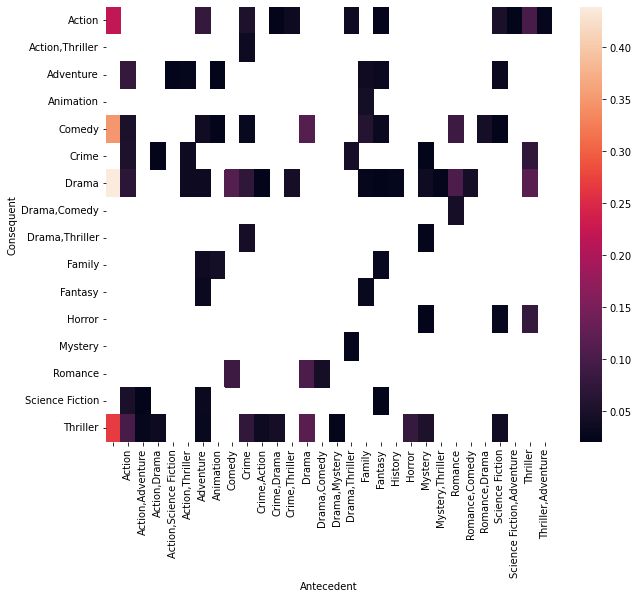

In [ ]:
#converting columns into matrix
table = rulesdf.pivot(index = 'Consequent', columns = 'Antecedent', values = 'Support')
plt.figure(figsize = (10,8))
sns.heatmap(table)

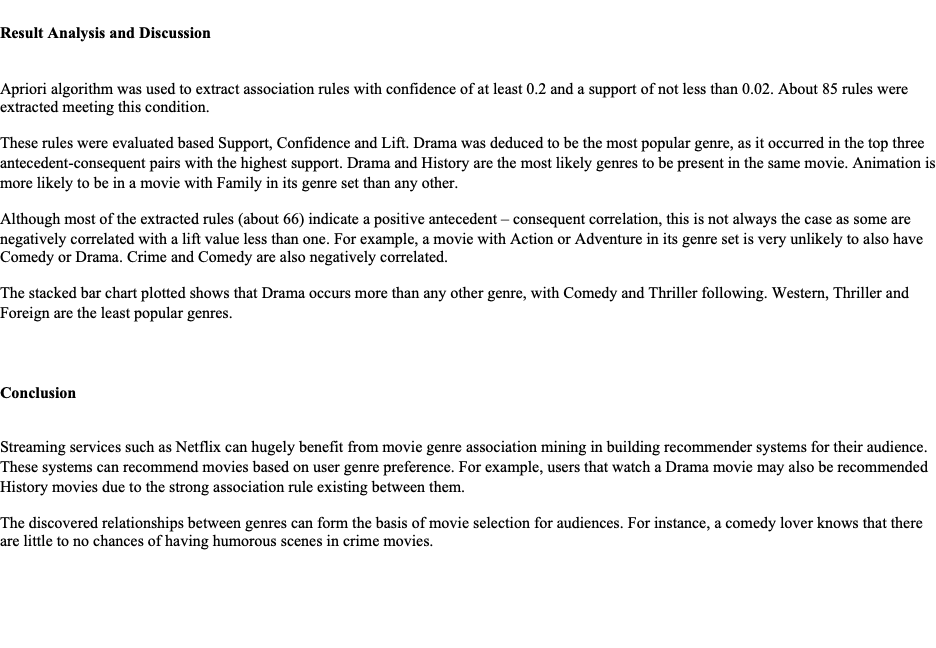